In [ ]:
features = ['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders', 
            'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)', 
            'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 
            'Fuel Consumption Comb (mpg)']
for feature in features:
    sns.histplot(data=emissions, x='CO2 Emissions(g/km)', bins=30, hue=feature, element="step")
    plt.title(f'CO2 Emissions vs. {feature}')
    plt.xlabel('CO2 Emissions(g/km)')
    plt.ylabel('Count')
    plt.show()

<Axes: >

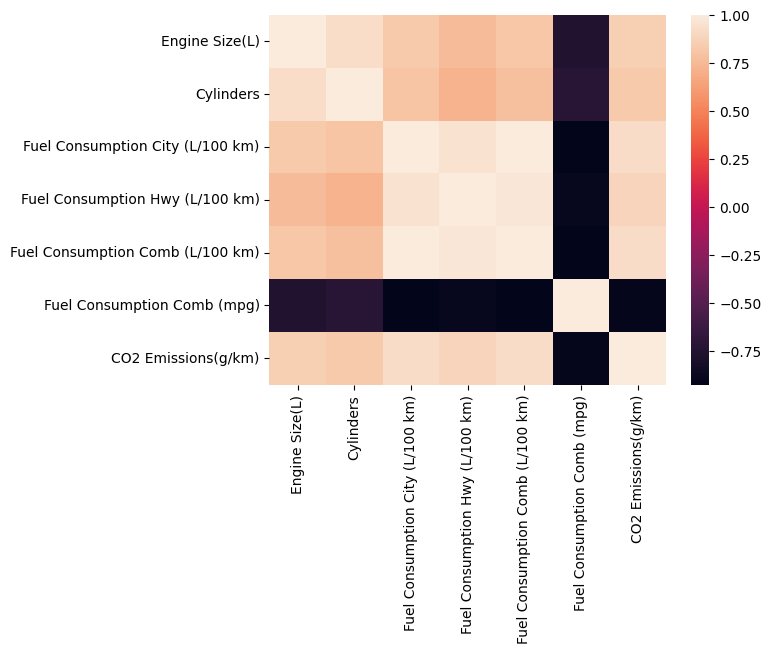

In [ ]:
sns.heatmap(emissions.corr(numeric_only=True))

#fuel consumption comb mpg inversamente proporcional a co2 emissions

In [ ]:
emissions.nunique()

Make                                  42
Model                               2053
Vehicle Class                         16
Engine Size(L)                        51
Cylinders                              8
Transmission                          27
Fuel Type                              5
Fuel Consumption City (L/100 km)     211
Fuel Consumption Comb (mpg)           54
CO2 Emissions(g/km)                  331
dtype: int64

#### Make

## Handling missing data and possible data transformations
- Remove missing values, outliers, and unnecessary rows/ columns
- Check and impute null values
- Check Imbalanced data
- Re-indexing and reformatting our data

In [ ]:
emissions.drop('Fuel Consumption Comb (L/100 km)', axis=1, inplace=True)
emissions.drop('Fuel Consumption Hwy (L/100 km)', axis=1, inplace=True)

### 1. Missing Values

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

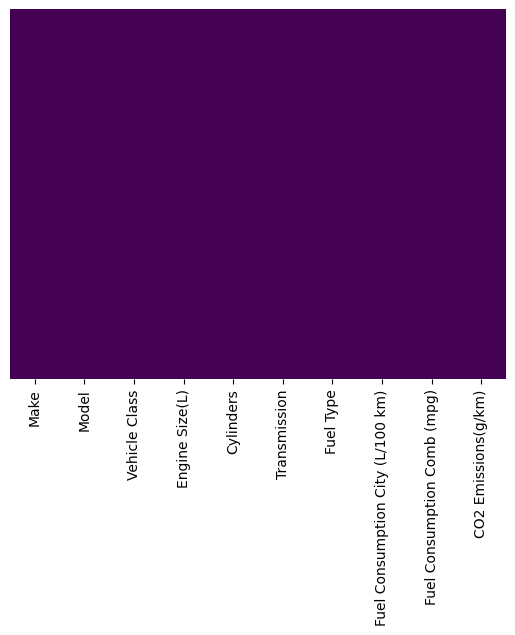

In [26]:
## Handling missing data and possible data transformations
- Remove missing values, outliers, and unnecessary rows/ columns
- Check and impute null values
- Check Imbalanced data
- Re-indexing and reformatting our data

Assim, podemos concluir que não existem missing values neste dataset

## Handling Categorical Features

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

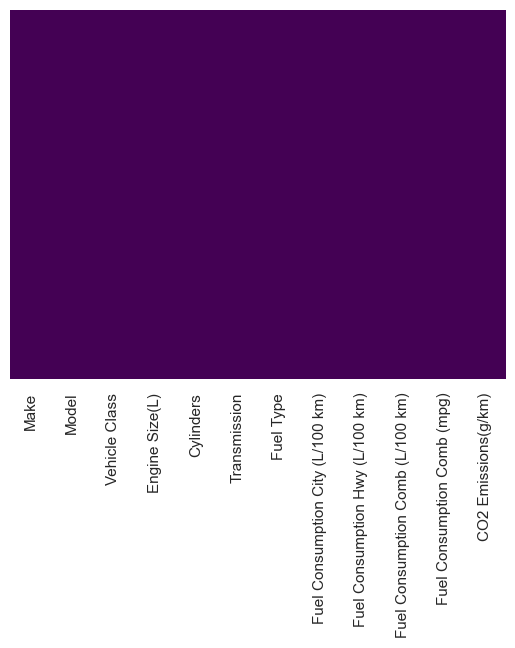

In [119]:
sns.heatmap(emissions.isnull(),yticklabels=False,cbar=False,cmap='viridis')
emissions.isnull().sum()

In [28]:
Assim, podemos concluir que não existem missing values neste dataset

Model
Unknown    5023
AWD        1104
4WD         751
FFV         438
LWB          39
SWB          15
EWB          15
Name: count, dtype: int64

In [29]:
nums = "0123456789"
emissions['Gear_Amount'] = emissions['Transmission'].str.extract(r'([0-9]+)')
emissions['Gear_Amount'] = emissions['Gear_Amount'].apply(lambda x: int(x) if x is not np.nan else 0)
emissions['Transmission'] = emissions['Transmission'].str.extract(r'([A-Z]+)')
emissions.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Gear_Amount
0,ACURA,Unknown,COMPACT,2.0,4,AS,Z,9.9,33,196,5
1,ACURA,Unknown,COMPACT,2.4,4,M,Z,11.2,29,221,6
2,ACURA,Unknown,COMPACT,1.5,4,AV,Z,6.0,48,136,7
3,ACURA,4WD,SUV - SMALL,3.5,6,AS,Z,12.7,25,255,6
4,ACURA,AWD,SUV - SMALL,3.5,6,AS,Z,12.1,27,244,6


In [30]:
emissions.drop('Vehicle Class', axis=1, inplace=True)
emissions.drop('Make', axis=1, inplace=True)


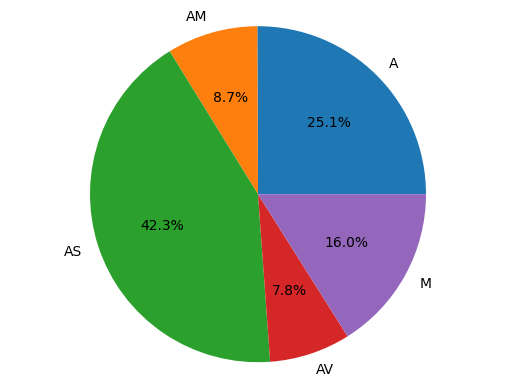

In [31]:
# transmission type is letters + one number, so take out the number
transmission_count = emissions['Transmission']
labels = transmission_count.astype('category').cat.categories.tolist()
counts = transmission_count.value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')
plt.show()

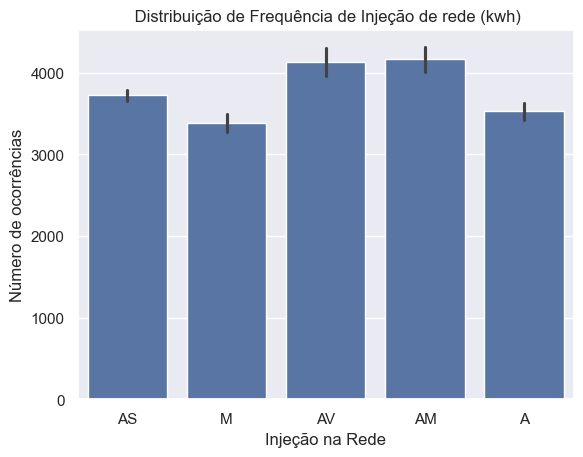

In [32]:
transmission_count = emissions['Transmission']
sns.set(style="darkgrid")
sns.barplot(x=transmission_count.values, y=transmission_count.index)
plt.title(' Distribuição de Frequência de Injeção de rede (kwh)')
plt.ylabel('Número de ocorrências', fontsize=12)
plt.xlabel('Injeção na Rede', fontsize=12)
plt.show()

### a) Binary Encoding

In [33]:
%pip install category_encoders

                                              0.0/81.9 kB ? eta -:--:--
     -----                                    10.2/81.9 kB ? eta -:--:--
     --------------                         30.7/81.9 kB 262.6 kB/s eta 0:00:01
     ----------------------------           61.4/81.9 kB 409.6 kB/s eta 0:00:01
     -------------------------------------- 81.9/81.9 kB 507.9 kB/s eta 0:00:00
                                              0.0/9.2 MB ? eta -:--:--
     -                                        0.3/9.2 MB 10.9 MB/s eta 0:00:01
     ---                                      0.9/9.2 MB 9.6 MB/s eta 0:00:01
     -------                                  1.8/9.2 MB 12.5 MB/s eta 0:00:01
     ------------                             2.9/9.2 MB 15.4 MB/s eta 0:00:01
     -------------------                      4.4/9.2 MB 18.9 MB/s eta 0:00:01
     ----------------------------             6.5/9.2 MB 23.2 MB/s eta 0:00:01
     ---------------------------------------  9.2/9.2 MB 27.9 MB/s eta 


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: C:\Users\rical\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


#### Encode Transmission

In [34]:
import category_encoders as ce

encoder_transmission = ce.BinaryEncoder(cols=['Transmission'])
df_binary = encoder_transmission.fit_transform(emissions)

df_binary.head()

,Model,Engine Size(L),Cylinders,Transmission_0,Transmission_1,Transmission_2,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Gear_Amount
0,Unknown,2.0,4,0,0,1,Z,9.9,33,196,5
1,Unknown,2.4,4,0,1,0,Z,11.2,29,221,6
2,Unknown,1.5,4,0,1,1,Z,6.0,48,136,7
3,4WD,3.5,6,0,0,1,Z,12.7,25,255,6
4,AWD,3.5,6,0,0,1,Z,12.1,27,244,6


#### Encode Fuel Type

In [35]:
encoder_fuel = ce.BinaryEncoder(cols=['Fuel Type'])
df_binary = encoder_fuel.fit_transform(df_binary)

df_binary.head()

,Model,Engine Size(L),Cylinders,Transmission_0,Transmission_1,Transmission_2,Fuel Type_0,Fuel Type_1,Fuel Type_2,Fuel Consumption City (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Gear_Amount
0,Unknown,2.0,4,0,0,1,0,0,1,9.9,33,196,5
1,Unknown,2.4,4,0,1,0,0,0,1,11.2,29,221,6
2,Unknown,1.5,4,0,1,1,0,0,1,6.0,48,136,7
3,4WD,3.5,6,0,0,1,0,0,1,12.7,25,255,6
4,AWD,3.5,6,0,0,1,0,0,1,12.1,27,244,6


#### Encode Model

In [36]:
encoder_model = ce.BinaryEncoder(cols=['Model'])
df_binary = encoder_model.fit_transform(df_binary)
emissions = df_binary
emissions.head()


,Model_0,Model_1,Model_2,Engine Size(L),Cylinders,Transmission_0,Transmission_1,Transmission_2,Fuel Type_0,Fuel Type_1,Fuel Type_2,Fuel Consumption City (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Gear_Amount
0,0,0,1,2.0,4,0,0,1,0,0,1,9.9,33,196,5
1,0,0,1,2.4,4,0,1,0,0,0,1,11.2,29,221,6
2,0,0,1,1.5,4,0,1,1,0,0,1,6.0,48,136,7
3,0,1,0,3.5,6,0,0,1,0,0,1,12.7,25,255,6
4,0,1,1,3.5,6,0,0,1,0,0,1,12.1,27,244,6


<Axes: >

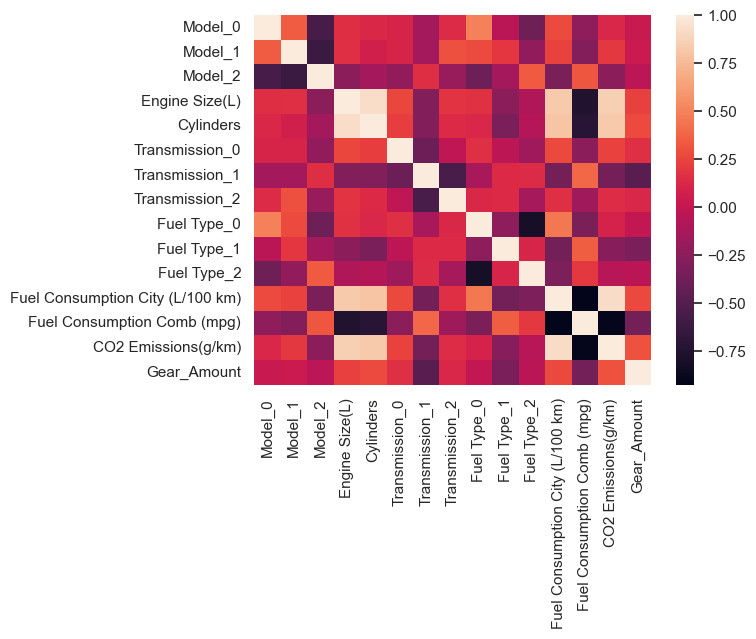

In [37]:
sns.heatmap(emissions.corr())

In [38]:
emissions.drop('Cylinders', axis=1, inplace=True)
emissions.head()

,Model_0,Model_1,Model_2,Engine Size(L),Transmission_0,Transmission_1,Transmission_2,Fuel Type_0,Fuel Type_1,Fuel Type_2,Fuel Consumption City (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Gear_Amount
0,0,0,1,2.0,0,0,1,0,0,1,9.9,33,196,5
1,0,0,1,2.4,0,1,0,0,0,1,11.2,29,221,6
2,0,0,1,1.5,0,1,1,0,0,1,6.0,48,136,7
3,0,1,0,3.5,0,0,1,0,0,1,12.7,25,255,6
4,0,1,1,3.5,0,0,1,0,0,1,12.1,27,244,6


<Axes: >

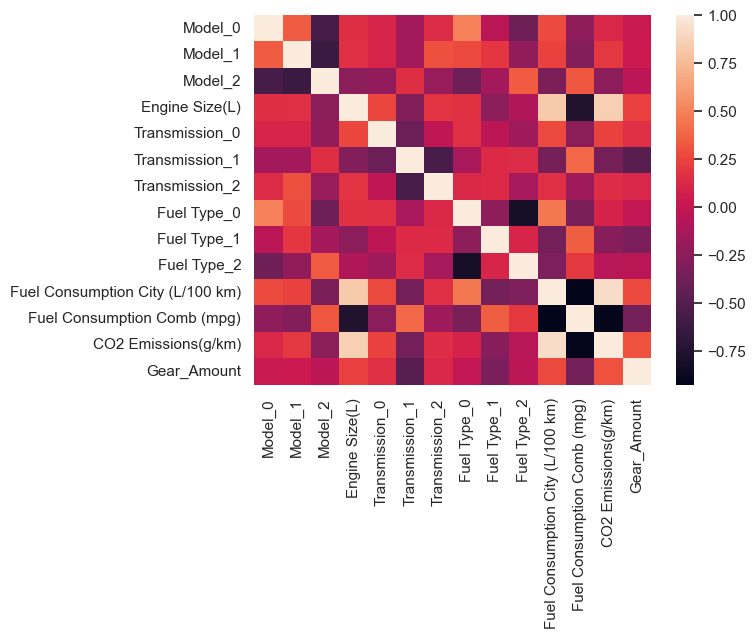

In [39]:
sns.heatmap(emissions.corr())

# Model Training and Testing

In [40]:
emissions.columns

Index(['Model_0', 'Model_1', 'Model_2', 'Engine Size(L)', 'Transmission_0',
       'Transmission_1', 'Transmission_2', 'Fuel Type_0', 'Fuel Type_1',
       'Fuel Type_2', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)', 'Gear_Amount'],
      dtype='object')

### X and y arrays

In [41]:
X = emissions[['Model_0', 'Model_1', 'Model_2', 'Engine Size(L)', 'Transmission_0',
       'Transmission_1', 'Transmission_2', 'Fuel Type_0', 'Fuel Type_1',
       'Fuel Type_2', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'Gear_Amount']]
y = emissions['CO2 Emissions(g/km)']

## Train Test Split

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=2023)

<Axes: xlabel='CO2 Emissions(g/km)', ylabel='Count'>

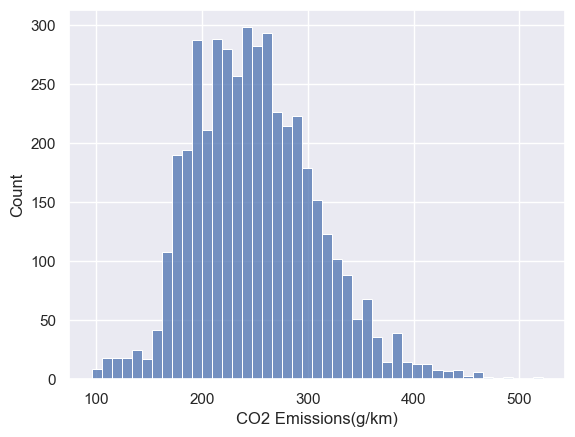

In [44]:
sns.histplot(y_train)

A partição não afetou significativamente a distribuição dos dados, enviasada para a esquerda

<Axes: xlabel='CO2 Emissions(g/km)', ylabel='Count'>

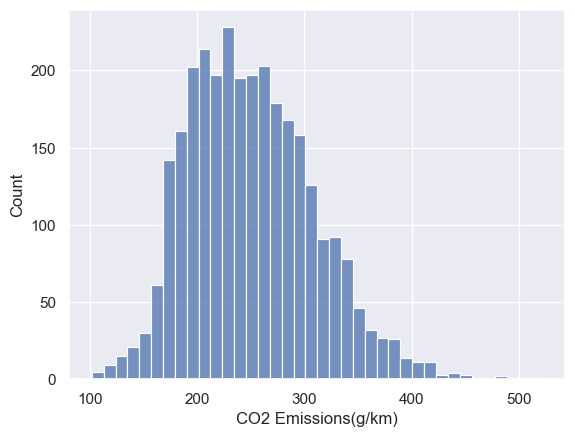

In [45]:
sns.histplot(y_test)

## Creating and Training the Model

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

### Model Evaluation

In [48]:
print(lm.intercept_)

111.8858552723758


In [49]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Model_0,-2.549052
Model_1,2.001509
Model_2,-6.120678
Engine Size(L),0.403980
Transmission_0,0.415261
Transmission_1,-0.386337
Transmission_2,0.332478
Fuel Type_0,-135.476943
Fuel Type_1,-0.218027
Fuel Type_2,-28.830197


### Predictions from our Model

In [50]:
predictions = lm.predict(X_test)

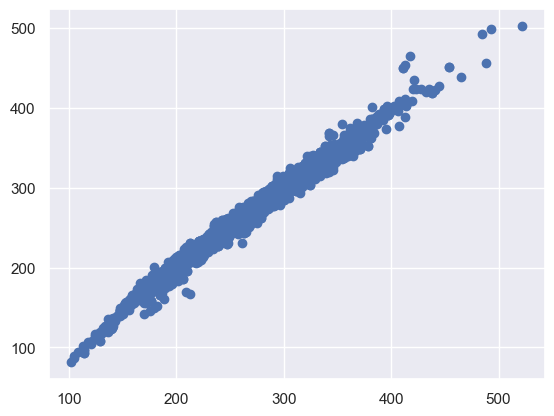

In [51]:
plt.scatter(y_test,predictions)

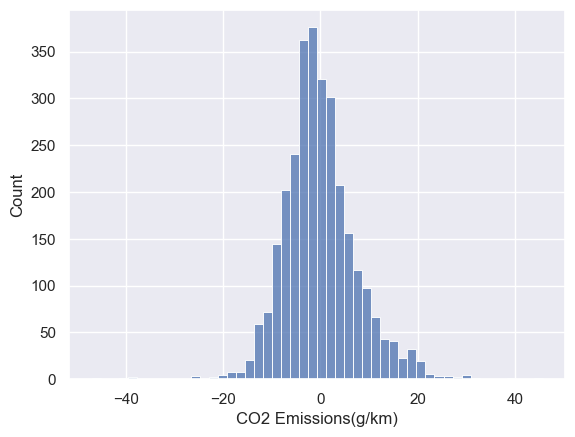

In [52]:
sns.histplot((y_test-predictions), bins=50);

### Regression Evaluation Metrics

In [53]:
from sklearn import metrics

In [54]:
print('MAE:', metrics.mean_absolute_error(y_test,predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE: 5.60038173887973
MSE: 56.44322405899166
RMSE: 7.51287056051092


In [55]:
from sklearn.metrics import r2_score
r_squared = r2_score(y_test, predictions)
print('R2:', r_squared)

R2: 0.9835618820517716


## Random Forest

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2023)

In [58]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [59]:
y_pred = model.predict(X_test)

In [60]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, y_pred)
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R^2: {r_squared}")

MSE: 10.531916553499487
MAE: 2.19402437046122
RMSE: 3.2452914435377735
R^2: 0.9969631315048751


# GridSearch

In [94]:
from sklearn.model_selection import GridSearchCV


In [109]:
param_grid = {
    'n_estimators': [50,100,150,300],
    'max_features': [3,5,10],
    'max_depth': [5,10,15],
    'criterion': ['poisson', 'squared_error', 'friedman_mse'],
    'ccp_alpha': [0.0,0.01,0.02]
}

In [110]:
grid_search = GridSearchCV(RandomForestRegressor(random_state=2023), param_grid=param_grid, cv=10, verbose=3, n_jobs=-1)

In [111]:
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 648 candidates, totalling 6480 fits


KeyboardInterrupt: 

In [ ]:
grid_search.best_params_

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'max_depth': 20,
 'max_features': 'sqrt',
 'n_estimators': 50}

In [ ]:
best_model = grid_search.best_estimator_
best_model

RandomForestRegressor(criterion='friedman_mse', max_depth=20,
                      max_features='sqrt', n_estimators=50, random_state=2023)

In [ ]:
y_prediction = grid_search.predict(X_test)
mse = mean_squared_error(y_test, y_prediction)
mae = mean_absolute_error(y_test, y_prediction)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, y_prediction)
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R^2: {r_squared}")

MSE: 12.406592695989964
MAE: 2.3213068047689713
RMSE: 3.522299347867805
R^2: 0.9964225703556511


# SVR

In [ ]:
from sklearn.svm import SVR

In [ ]:
param_grid = { 'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf', 'linear', 'sigmoid']}

In [ ]:
grid_svr = GridSearchCV(SVR(random_state=2023), param_grid, refit = True, verbose = 3)

In [ ]:
grid_svr.fit(X_train, y_train)

In [ ]:
grid_svr.best_params_

In [ ]:
grid_svr.best_estimator_

In [ ]:
grid_svr_predictions = grid_svr.predict(X_test)
mse = mean_squared_error(y_test, grid_svr_predictions)
mae = mean_absolute_error(y_test, grid_svr_predictions)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, grid_svr_predictions)
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R^2: {r_squared}")